# Brief Analysis of Biodiversity in four United States National Parks

In this project I explore two datasets that contain information about various species observed in the four U.S. National Parks:
Yellowstone, Yosemite, Bryce, Great Smoky Mountains and investigate patterns in conservation statuses of various species. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numexpr as ne
import dexplot as dxp
from scipy.stats import chi2_contingency

First I will load the two .csv files into DataFrames.

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 50)

## How often are different species observed in US parks?

First I will work with the 'observations' dataset. This dataset includes:
* Scientific name of each species
* Park name
* Number of obsevations

Each row illustrates how many times a particular species was observed in a particular park.

In [3]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [4]:
observations.scientific_name.nunique()

5541

The 'observations' dataframe includes information about 5,541 species.
I will now prepare the dataframe for further analysis. It is important to ensure that this dataset does not contain any duplicates.

In [5]:
observations[observations.duplicated(['scientific_name', 'park_name'], keep = False)]

,scientific_name,park_name,observations
15,Lunaria annua,Great Smoky Mountains National Park,65
22,Elodea nuttallii,Yosemite National Park,158
25,Amaranthus retroflexus,Yellowstone National Park,247
27,Scirpus cyperinus,Great Smoky Mountains National Park,73
30,Glyceria striata,Yosemite National Park,117
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


It looks like this dataframe contains multiple entries for the same species. Importantly, these are not duplicates, but rather different instances of records of observations. To simplify further analyses, I will sum observations in the same parks for the same species.
I will then check that there are no more duplicates.

In [6]:
park_data = observations.groupby(['park_name', 'scientific_name']).observations.sum().reset_index()
park_data[park_data.duplicated(['scientific_name', 'park_name'], keep = False)]

,park_name,scientific_name,observations


***
I will now use these data to answer:
* What are top-10 most observed species in each park?
* What are the rarest 10 species in each park?
***

In [7]:
bryce_park = park_data[park_data.park_name == 'Bryce National Park'].copy()
bryce_park.sort_values(by = ['observations'], ascending=False, inplace = True)
bryce_park.drop(columns = 'park_name', inplace = True)
print('The 10 most often observed species in Bryce National Park are:')
display(bryce_park.head(10))
print('The 10 least observed species in Bryce National Park are:')
display(bryce_park.tail(10))

great_smoky_mountains = park_data[park_data.park_name == 'Great Smoky Mountains National Park'].copy()
great_smoky_mountains.sort_values(by = ['observations'], ascending=False, inplace = True)
great_smoky_mountains.drop(columns = 'park_name', inplace = True)
print('The 10 most often observed species in Great Smoky Mountains National Park are:')
display(great_smoky_mountains.head(10))
print('The 10 least observed species in Great Smoky Mountains National Park are:')
display(great_smoky_mountains.tail(10))

yosemite = park_data[park_data.park_name == 'Yellowstone National Park'].copy()
yosemite.sort_values(by = ['observations'], ascending=False, inplace = True)
yosemite.drop(columns = 'park_name', inplace = True)
print('The 10 most often observed species in Yellowstone National Park are:')
display(yosemite.head(10))
print('The 10 least observed species in Yellowstone National Park are:')
display(yosemite.tail(10))

yellowstone = park_data[park_data.park_name == 'Yosemite National Park'].copy()
yellowstone.sort_values(by = ['observations'], ascending=False, inplace = True)
yellowstone.drop(columns = 'park_name', inplace = True)
print('The 10 most often observed species in Yosemite National Park are:')
display(yellowstone.head(10))
print('The 10 least observed species in Yosemite National Park are:')
display(yellowstone.tail(10))

The 10 most often observed species in Bryce National Park are:


,scientific_name,observations
1359,Columba livia,339
4179,Puma concolor,311
533,Avena sativa,303
4993,Streptopelia decaocto,301
3322,Myotis lucifugus,298
2452,Holcus lanatus,296
2555,Hypochaeris radicata,294
1103,Castor canadensis,278
5411,Viola arvensis,277
174,Amaranthus albus,268


The 10 least observed species in Bryce National Park are:


,scientific_name,observations
3324,Myotis sodalis,27
2030,Etheostoma percnurum,25
2273,Geum radiatum,25
2323,Grus americana,24
3778,Picoides borealis,24
1206,Chasmistes liorus,23
3394,Noturus baileyi,22
3492,Ovis canadensis sierrae,22
5356,Vermivora bachmanii,20
1415,Corydalis aurea,9


The 10 most often observed species in Great Smoky Mountains National Park are:


,scientific_name,observations
10534,Streptopelia decaocto,256
9650,Procyon lotor,247
6644,Castor canadensis,243
9720,Puma concolor,239
7698,Fragaria virginiana,217
7993,Holcus lanatus,216
8721,Microtus longicaudus,212
5858,Apocynum androsaemifolium,210
9512,Polygonum aviculare,206
10557,Sus scrofa,205


The 10 least observed species in Great Smoky Mountains National Park are:


,scientific_name,observations
7869,Gymnogyps californianus,15
8865,Myotis sodalis,14
8627,Malva moschata,14
10195,Seiurus aurocapilla,13
6346,Canis rufus,13
7864,Grus americana,13
10066,Sambucus mexicana,12
10541,Strix occidentalis,11
9788,Rana sierrae,11
6896,Collomia tinctoria,10


The 10 most often observed species in Yellowstone National Park are:


,scientific_name,observations
13534,Holcus lanatus,805
16075,Streptopelia decaocto,771
15261,Puma concolor,753
15191,Procyon lotor,745
13637,Hypochaeris radicata,726
12441,Columba livia,722
12185,Castor canadensis,703
14404,Myotis lucifugus,679
11665,Bidens tripartita,602
15940,Sorex hoyi,573


The 10 least observed species in Yellowstone National Park are:


,scientific_name,observations
14476,Noturus baileyi,67
13374,Glaucomys sabrinus coloratus,67
12288,Chasmistes liorus,65
14860,Picoides borealis,64
13410,Gymnogyps californianus,64
13355,Geum radiatum,63
15329,Rana sierrae,60
11887,Canis rufus,60
16438,Vermivora bachmanii,58
13405,Grus americana,57


The 10 most often observed species in Yosemite National Park are:


,scientific_name,observations
19178,Hypochaeris radicata,505
17726,Castor canadensis,501
19075,Holcus lanatus,463
21616,Streptopelia decaocto,457
20732,Procyon lotor,453
17982,Columba livia,423
20802,Puma concolor,408
19945,Myotis lucifugus,396
19994,Nepeta cataria,387
16743,Agrostis variabilis,382


The 10 least observed species in Yosemite National Park are:


,scientific_name,observations
20870,Rana sierrae,42
18653,Etheostoma percnurum,40
19942,Myotis grisescens,39
20115,Ovis canadensis sierrae,39
18946,Grus americana,37
19947,Myotis sodalis,36
18915,Glaucomys sabrinus coloratus,36
17829,Chasmistes liorus,35
17428,Canis rufus,34
20017,Noturus baileyi,31


Information on the most often observed and the least observed species could be utilised by the National Parks staff to prioritise any conservation activities.

## Conservation statuses of various species

I will first explore the dataset.
This dataset includes:
* Category of each species (*I will explore what categories are present in this dataset in a moment*)
* Scientific name
* Common names
* Conservation status of each species

Each row illustrates how many times a particular species was observed in each park.

In [8]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [9]:
print('The dataset contains the following categories:', species.category.unique(), '\n')

print('The dataset contains the following conservation statuses:', species.conservation_status.unique(), '\n')

print('The dataset includes information about', species.scientific_name.nunique(), 'species.')

The dataset contains the following categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant'] 

The dataset contains the following conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery'] 

The dataset includes information about 5541 species.


The dataset categorises all species into one of seven categories and assings each species one of four conservation statuses, in addition to 'nan.

For the purposes of this analysis, conservation statuses mean the following:
* In Recovery: formerly Endangered, but currently not in danger of extinction.
* Species of Concern: declining or appear to be in need of conservation.
* Threatened: vulnerable to likely to be endangerment in the near future.
* Endangered: seriously at risk of extinction.

I will now check whether this dataset contains any duplicates.

In [10]:
species[species.duplicated(['scientific_name', 'common_names'], keep = False)]

,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


There are four duplicates that have conflicting information about conservation status of Rainbow Trout (Oncorhynchus mykiss) and Gray Wolf (Canis lupus). In the absence of other information, I searched the current US conservantion status of these two species to identify which duplicate row should remain. Both of these species are currently 'secure'. Thus, I am going to remove duplicated rows and update the conservation status of Gray Wolf.

In [11]:
species.drop([3283, 4448], inplace = True)

Final check to make sure there are no duplicates.

In [12]:
species[species.duplicated(['scientific_name', 'common_names'], keep = False)]

,category,scientific_name,common_names,conservation_status


In [13]:
species.sort_values(by=['scientific_name'])
species[species.duplicated(['scientific_name'], keep = False)]

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
8,Mammal,Canis lupus,Gray Wolf,Endangered
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [14]:
species.reset_index(inplace = True, drop = True)

Updating the conservation status of Gray Wolf and checking to ensure that the row has correct information.

In [15]:
species.iloc[3020]
species.loc[3020,'conservation_status'] = None
species.iloc[3020]

category                        Mammal
scientific_name            Canis lupus
common_names           Gray Wolf, Wolf
conservation_status               None
Name: 3020, dtype: object

One final data preparation step - assuming that all species whose 'conservation status' is NaN do not fall under any other category, I will change NaN values to 'Least Concern'.

In [16]:
species['conservation_status'].fillna('Least Concern', inplace=True)

### What is the distribution of conservation statuses among different categories of animals?

I will now explore the dataset. Firstly, I would like to understand how common each of the conservation statuses are.

In [17]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,3
2,Least Concern,5364
3,Species of Concern,151
4,Threatened,9


The vast majority of all species are categorised as 'Least Concern'.

I would like to look into each conservation status in a little more detail to understand the the distribution of each category of animals within each conservation staus.

*I chose dexplot because it allows to plot normalised values in one step. Despite lacking some other functionality, for my current purposes it is the most efficient option.*

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


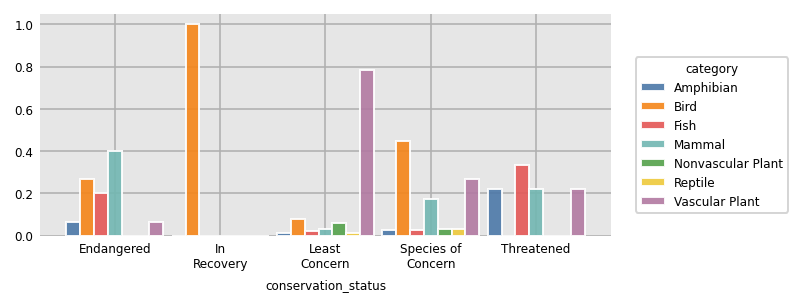

In [18]:
display(dxp.count('conservation_status', data=species, split='category', normalize = 'conservation_status'))

A few quick observations: 
* The majority of species of 'Least Concern' are vascular plants which is in line with what one might expect as vascular plants can be simply referred to be 'usual' or common plants.
* The only category of animal categorised as ' In Recovery' in this dataset are birds.
* The most common 'Species of Concern' are birds, with vascular plants and mammals comprising around 20 per cent of this category, each.
* Fish appear to be the most common species in the 'Threatened' category with Amphibian, Mammal and Vascular Plant sharing the remainder of this category in almost equal proporion.
* Finally, the majority of species within 'Endangered' category are mammals, with birds and fish being the second and third most common types of species in this category.

Another way of looking at the data is to pivot it. Let's see if the pivot provides any further insights into the data.

In [19]:
species.pivot_table(values='scientific_name', index='category', columns='conservation_status', aggfunc=pd.Series.nunique, margins = True)

conservation_status,Endangered,In Recovery,Least Concern,Species of Concern,Threatened,All
category,,,,,,
Amphibian,1.0,NaN,72.0,4.0,2.0,79
Bird,4.0,3.0,413.0,68.0,NaN,488
Fish,3.0,NaN,115.0,4.0,3.0,125
Mammal,6.0,NaN,147.0,22.0,2.0,176
Nonvascular Plant,NaN,NaN,328.0,5.0,NaN,333
Reptile,NaN,NaN,73.0,5.0,NaN,78
Vascular Plant,1.0,NaN,4216.0,43.0,2.0,4262
All,15.0,3.0,5364.0,151.0,9.0,5541


This pivot would have been useful if I wanted to make comparisons between conservation statuses, for example. However, I am more interested in finding out what proportion of species have one of the conservation statuses that warrant a conservation action.
I will create a new column and look into the differences between the categories by counting the number of unique species in each cell.

In [20]:
species['action_required'] = species.conservation_status != 'Least Concern'
species.head()

,category,scientific_name,common_names,conservation_status,action_required
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False


In [21]:
category_counts = species.groupby(['category','action_required']).scientific_name.nunique().reset_index()
category_counts.head(14)

,category,action_required,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,10
6,Mammal,False,147
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


I will pivot the above data to see the differences more clearly and add a column showing the percent of species that warrant a conservation action.

In [22]:
category_pivot = category_counts.pivot_table(index = 'category', columns = 'action_required', values = 'scientific_name', aggfunc = sum).reset_index()
category_pivot.columns = ['category', 'action_not_required', 'action_required']
category_pivot['percent_action_required'] = (category_pivot.action_required/(category_pivot.action_required + category_pivot.action_not_required))*100
category_pivot.sort_values(['percent_action_required'],ascending=False)

,category,action_not_required,action_required,percent_action_required
3,Mammal,147,30,16.949153
1,Bird,413,75,15.368852
0,Amphibian,72,7,8.860759
2,Fish,115,10,8.000000
5,Reptile,73,5,6.410256
4,Nonvascular Plant,328,5,1.501502
6,Vascular Plant,4216,46,1.079305


Mammals have the highest proportion of species that require a conservation action (17 per cent), closely followed by birds (15 per cent). Both amfibians and fish have a similar proportion of species that require a conservation status (around 8 per cent). Reptiles have 6.4 per cent of those species. The proportion is considerably smaller for plants with only aroun 1 per cent of plant species requiring conservation action.

But what if we wanted to make sure that the difference between mammals and birds is significant? I will do a significance test to check whether that is the case. I am going to use a chi-squared test because I will be comparing two categorical variables.

The first step is creating a contigency table.

In [23]:
contingency = pd.DataFrame([[30,147],[75,413]], columns = ['action required','action not required'], index = ['Mammal','Bird'])
contingency

,action required,action not required
Mammal,30,147
Bird,75,413


In [24]:
chi2_contingency(contingency)
print('The chi squared test statistic is :%1.15f'%chi2_contingency(contingency)[0])
print('The p-value is :%1.15f'%chi2_contingency(contingency)[1])
print('The degrees of freedom is: %1.0f'%chi2_contingency(contingency)[2])

The chi squared test statistic is :0.139582621812386
The p-value is :0.708696295681018
The degrees of freedom is: 1


Despite the apparent difference between mammals and birds in the proportion of species that require a conservation action, the chi-squared test demonstrated that these differences are not statistically significant. This might indicate to conservationists that they need to direct more conservation efforts towards both of these categories.

## Distribution of species in each park

In this next step I would like to find out the distribution of categories of species in each park. I can do this by combining the two datasets. However, before doing so, I need to prepare the data: I will keep only the relevant columns from the species dataframe and ensure that there are no duplicate values.

In [25]:
species_scientific = species.drop(columns=['common_names', 'conservation_status', 'action_required'])
species_scientific.head()

,category,scientific_name
0,Mammal,Clethrionomys gapperi gapperi
1,Mammal,Bos bison
2,Mammal,Bos taurus
3,Mammal,Ovis aries
4,Mammal,Cervus elaphus


In [26]:
species_scientific[species_scientific.duplicated(keep = False)]

,category,scientific_name
4,Mammal,Cervus elaphus
5,Mammal,Odocoileus virginianus
6,Mammal,Sus scrofa
8,Mammal,Canis lupus
10,Mammal,Urocyon cinereoargenteus
...,...,...
5617,Vascular Plant,Panicum rigidulum var. rigidulum
5636,Vascular Plant,Setaria pumila
5638,Vascular Plant,Vulpia bromoides
5641,Vascular Plant,Vulpia myuros


In [27]:
species_scientific.drop_duplicates(inplace = True)

In [28]:
species_scientific[species_scientific.duplicated(keep = False)]

,category,scientific_name


Now the dataframes are ready to be merged. I will use the outer merge to make sure that no values get lost due to any mismatched labels.

In [29]:
species_observations = pd.merge(species_scientific, park_data, how='outer')
species_observations.head()

,category,scientific_name,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Great Smoky Mountains National Park,98
2,Mammal,Clethrionomys gapperi gapperi,Yellowstone National Park,270
3,Mammal,Clethrionomys gapperi gapperi,Yosemite National Park,117
4,Mammal,Bos bison,Bryce National Park,68


In [30]:
species_observations[species_observations.duplicated(['scientific_name', 'park_name', 'observations'], keep = False)]

,category,scientific_name,park_name,observations


In [31]:
species_observations.isnull().values.any()

False

I will now visualise the total number of observations of each category of species to see if I can spot any patterns.

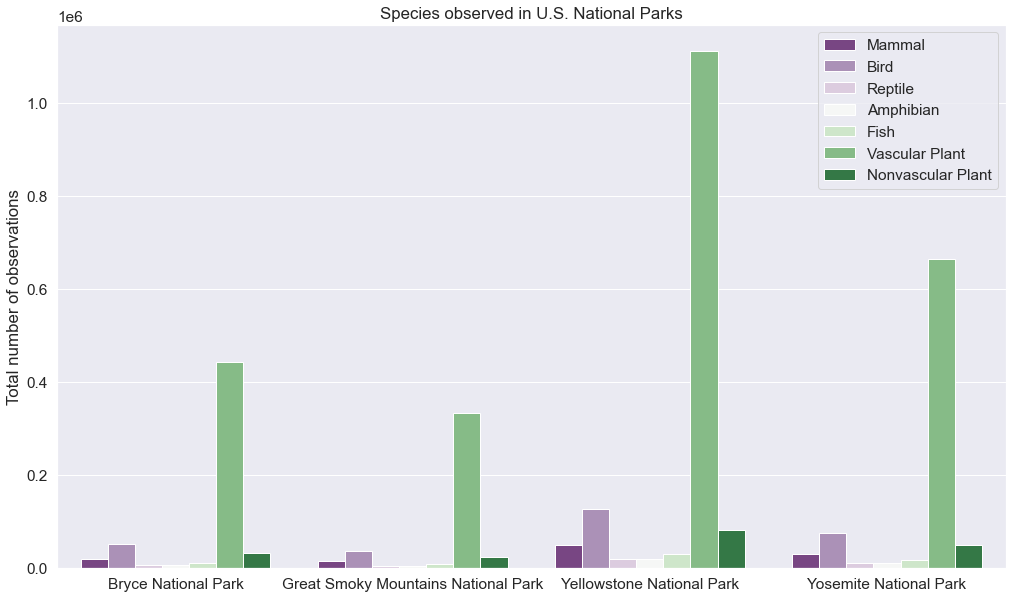

In [32]:
sns.set(font_scale = 1.4)
sns.set_palette('PRGn', 7)
sns.set_style()

plt.figure(figsize=(17, 10))
ax = sns.barplot(x = 'park_name', y='observations', hue = 'category', estimator = sum, data=species_observations, ci = None, saturation = 0.75)
ax.legend(loc='upper right', frameon=True)
ax.set(title = 'Species observed in U.S. National Parks', ylabel='Total number of observations', xlabel='');

* This visualisation highlights that there were considerably more observations of vascular plants across all four parks (vascular plants were observed 2,555,050 times in total). This is not surpising given that vascular plants are the most common species on Earth.
* Birds were the second most observed species (292,833), nonvascular plants the third most observed species(190,653).
* Mammals were also observed relatively frequently (116,696), especially compared to fish (70,818), reptiles (44,678) and amphibians (43,971).
* The Yellowstone National Park had the highest number of observations among all parks. This is to be expected because Yellowstone is much larger than other parks in this dataset.
* Overall, the distribution of categories of species appears to follow the same general pattern across all four parks.

I also created a pivot table below to make it easier to refer to particular numbers.

In [33]:
species_observations.pivot_table(values='observations', index='category', columns='park_name', aggfunc=sum)

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
category,,,,
Amphibian,7380,5707,19440,11444
Bird,51647,37728,127251,76207
Fish,12423,9206,30574,18615
Mammal,20550,15012,50795,30339
Nonvascular Plant,32992,24857,83021,49783
Reptile,7950,5691,19554,11483
Vascular Plant,443083,333619,1112927,665461


## How often are mountain lions (cougars) observed in each park?

In this final piece of analysis I would like to understand how often lions are observed in each park.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fe/Puma_concolor._Costa_Rica.jpg" alt="Cougar" style="width: 400px;"/>

The cougar is a large cat that is native to the Americas. Its range spans from the Canadian Yukon to the southern Andes in South America and is the most widespread of any large wild terrestrial mammal in the Western Hemisphere. It is an adaptable, generalist species, occurring in most American habitat types. Due to its wide range, it has many names including puma, mountain lion, panther, painter and catamount.

First I will find all rows in the species dataframe that contain words 'Lion' (I know that all species start with a capital letter in this dataset).

In [34]:
species['lion'] = species.common_names.apply(lambda x: 'Lion' in x)
species[species.lion]

,category,scientific_name,common_names,conservation_status,action_required,lion
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,True
16,Mammal,Puma concolor,Panther (Mountain Lion),Least Concern,False,True
897,Vascular Plant,Prenanthes serpentaria,"Lion's-Foot, Rattlesnakeroot",Least Concern,False,True
898,Vascular Plant,Prenanthes trifoliolata,"Lion's Foot, Three-Leaved Rattlesnake-Root",Least Concern,False,True
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Least Concern,False,True
4449,Mammal,Puma concolor,Mountain Lion,Least Concern,False,True


Two of the records refer to plants so I am going to select only those results that refer to mammals.

In [35]:
lions = species[species.lion & (species.category =='Mammal')].copy()
lions

,category,scientific_name,common_names,conservation_status,action_required,lion
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,True
16,Mammal,Puma concolor,Panther (Mountain Lion),Least Concern,False,True
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Least Concern,False,True
4449,Mammal,Puma concolor,Mountain Lion,Least Concern,False,True


Out of four records, there are only two species, so I am going to remove rows 3022 and 4449 and drop columns that are not required for further analyses.

In [36]:
lions.drop(columns=['common_names', 'conservation_status', 'action_required', 'lion'], inplace = True)

In [37]:
lions.drop([3022, 4449], inplace = True)

In [38]:
lions


,category,scientific_name
13,Mammal,Felis concolor
16,Mammal,Puma concolor


Now I am going to merge park data with the lions dataframe.

In [39]:
lion_observations = park_data.merge(lions)
lion_observations

,park_name,scientific_name,observations,category
0,Bryce National Park,Felis concolor,65,Mammal
1,Great Smoky Mountains National Park,Felis concolor,72,Mammal
2,Yellowstone National Park,Felis concolor,284,Mammal
3,Yosemite National Park,Felis concolor,146,Mammal
4,Bryce National Park,Puma concolor,311,Mammal
5,Great Smoky Mountains National Park,Puma concolor,239,Mammal
6,Yellowstone National Park,Puma concolor,753,Mammal
7,Yosemite National Park,Puma concolor,408,Mammal


Each of the two lion species were observed in each park. What if I wanted to find the number of observations across both types of lion species?

In [40]:
lions_in_parks = lion_observations.groupby('park_name').observations.sum().reset_index()
lions_in_parks.sort_values(by = ['observations'], ascending = False)

,park_name,observations
2,Yellowstone National Park,1037
3,Yosemite National Park,554
0,Bryce National Park,376
1,Great Smoky Mountains National Park,311


Again, similarly to the previous analysis, Yellowstone had considerably more observations of lions than any other park. The overall distribution of observations followed the general pattern of mammal distribution observed in the previous analysis with Yosemite having approximately half of the observations of Yellowstone and Bryce and Great Smoky Mountains having similar number of observations, with the latter having the fewest number of observations.